In [2]:
 %matplotlib notebook

import obspy
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
import matplotlib.pyplot as plt
client = Client("IRIS")
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
import numpy as np
import math
import pandas as pd

In [3]:
#waveform functions to make importing data easier
def waveforms(energystart, energyend, adjtime):
    s_energy = UTCDateTime(energystart)
    e_energy = UTCDateTime(energyend)
    start_t = s_energy - adjtime
    end_t = e_energy + adjtime
    event_st = client.get_waveforms("XB", "ELYSE", "02", "B*", start_t, end_t)
    return event_st

def waveform_plotter(date, filtered, event, ax, ylim = False, channels = [0,1,2]):
    d = date[0:10]
    
    for channel in channels:
        full_code = filtered[channel].id
        code = full_code[12:]
        offset = channel * np.full(len(filtered[channel]), fill_value=200) 
        
        tr = filtered[channel]
        t = tr.times('matplotlib')
        
        if code == 'BHU':
            ax.plot(t, filtered[channel].data + offset, label=code, color = "#1f77b4", alpha = 0.7)
        elif code == 'BHV':
            ax.plot(t, filtered[channel].data + offset, label=code, color = "#ff7f0e", alpha = 0.7)
        elif code == 'BHW':
            ax.plot(t, filtered[channel].data + offset, label=code, color = "#2ca02c", alpha = 0.7)
        else:
            ax.plot(t, filtered[channel].data + offset, label="Unknown " + code, color = "black", alpha = 0.7)
    
    ax.xaxis_date()
    x_labels = ax.get_xticklabels()
    ax.set_xticklabels(x_labels, rotation=30, ha='right', va='center_baseline', size=9)
    ax.xaxis.set_major_formatter(DateFormatter('%H:%M:%S'))
    ax.xaxis.set_major_locator(ticker.MaxNLocator(8))
    
    ax.axvline(pd.to_datetime(date), c='r', ls='--', alpha = 0.5)
    
    if ylim == True:
        ax.set_ylim(-800,1000)

    ax.set_title(event + "\n" + "UTC " + d, size=10)
    
def waveform_filter(stream, event_type):
    
    stream.detrend('linear')
    stream.taper(max_percentage=0.05, type='cosine')
    
    if event_type == 'lf' or 'bb':
        filtered_stream1 = stream.filter('bandpass', freqmin = 0.125, freqmax = 0.5)
        return filtered_stream1
    elif event_type == 'hf':
        filtered_stream2 = stream.filter('highpass', freq = 1)
        return filtered_stream2
    elif event_type == '2.4':
        filtered_stream3 = stream.filter('bandpass', freqmin = 1, freqmax = 4)
        return filtered_stream3
    elif event_type == 'shf':
        filtered_stream4 = stream.filter('bandpass', freqmin = 8, freqmax = 15)
        return filtered_stream4
    elif event_type == 'vhf':
        filtered_stream5 = stream.filter('bandpass', freqmin == 5, freqmax = 10)
        return filtered_stream5
    else:
        text = "This isn't a valid event type"
        return text
    
def xyz_plotter(date, filtered, event, ax, ylim = False, channels=[0,1,2]):
    day = date[0:10]
    
    for channel in channels:
        full_code = filtered[channel].id
        code = full_code[12:]
        
        tr = filtered[channel]
        t = tr.times('matplotlib')
        
        if code == 'BHU':
            U = filtered[channel].data
        elif code == 'BHV':
            V = filtered[channel].data
        elif code == 'BHW':
            W = filtered[channel].data
            
    
    d = np.radians(-30)
    aU = np.radians(135)
    aV = np.radians(15)
    aW = np.radians(255)
    
    A = np.array([[np.cos(d)*np.sin(aU),np.cos(d)*np.cos(aU),np.sin(d)],
    [np.cos(d)*np.sin(aV), np.cos(d)*np.cos(aV), np.sin(d)],
    [np.cos(d)*np.sin(aW), np.cos(d)*np.cos(aW), np.sin(d)]])
    
    B = np.linalg.inv(A)
    
    E,N,Z = np.dot(B,(U,V,W))

    offset = np.full(len(Z), fill_value=200)

    ax.plot(t, E + 2*offset, label='East', color = "#77e59b", alpha = 0.8)
    ax.plot(t, N + offset, label='North', color = "#ffabab", alpha = 0.8)
    ax.plot(t, Z, label = 'Z', color = "#b28dff", alpha = 0.8)

    ax.xaxis_date()
    x_labels = ax.get_xticklabels()
    ax.set_xticklabels(x_labels, rotation=30, ha='right', va='center_baseline', size=9)
    ax.xaxis.set_major_formatter(DateFormatter('%H:%M:%S'))
    ax.xaxis.set_major_locator(ticker.MaxNLocator(8))

    if ylim == True:
        ax.set_ylim(-1800,2000)
        
    ax.axvline(pd.to_datetime(date), c='r', ls='--', alpha = 0.5)

    ax.set_title(event + "\n" + "UTC " + day, size=10)

<IPython.core.display.Javascript object>


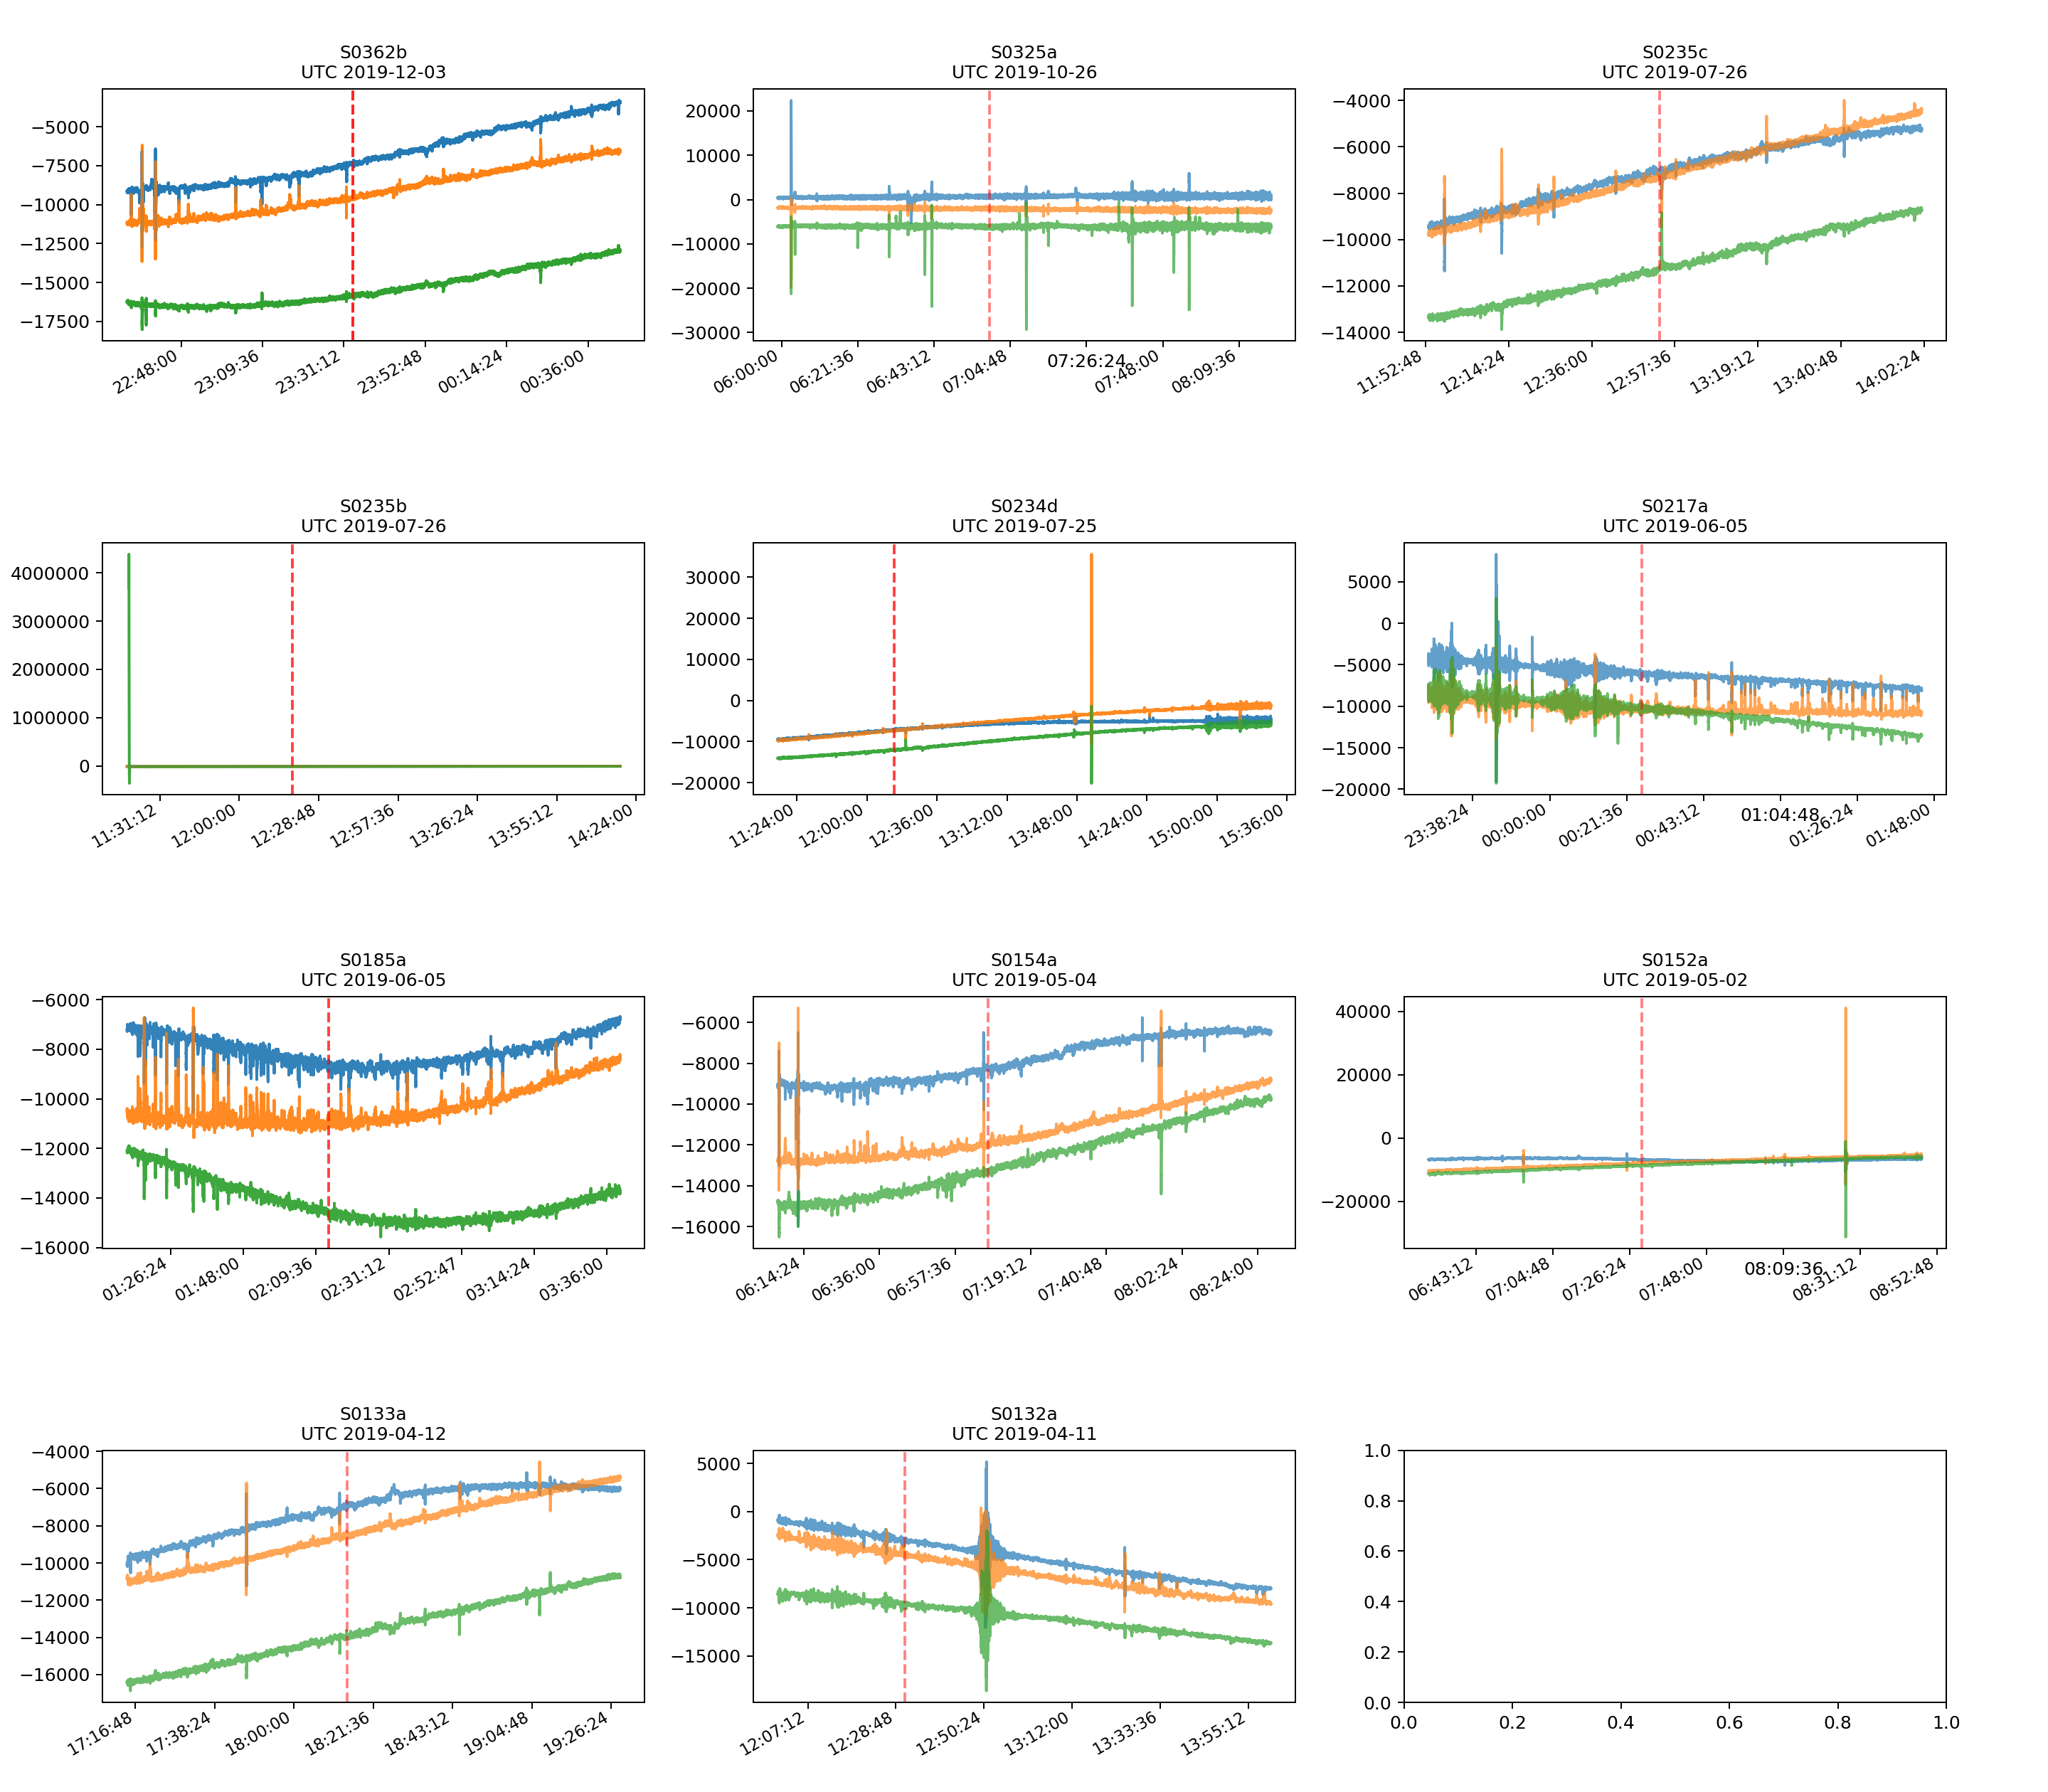

<IPython.core.display.Javascript object>


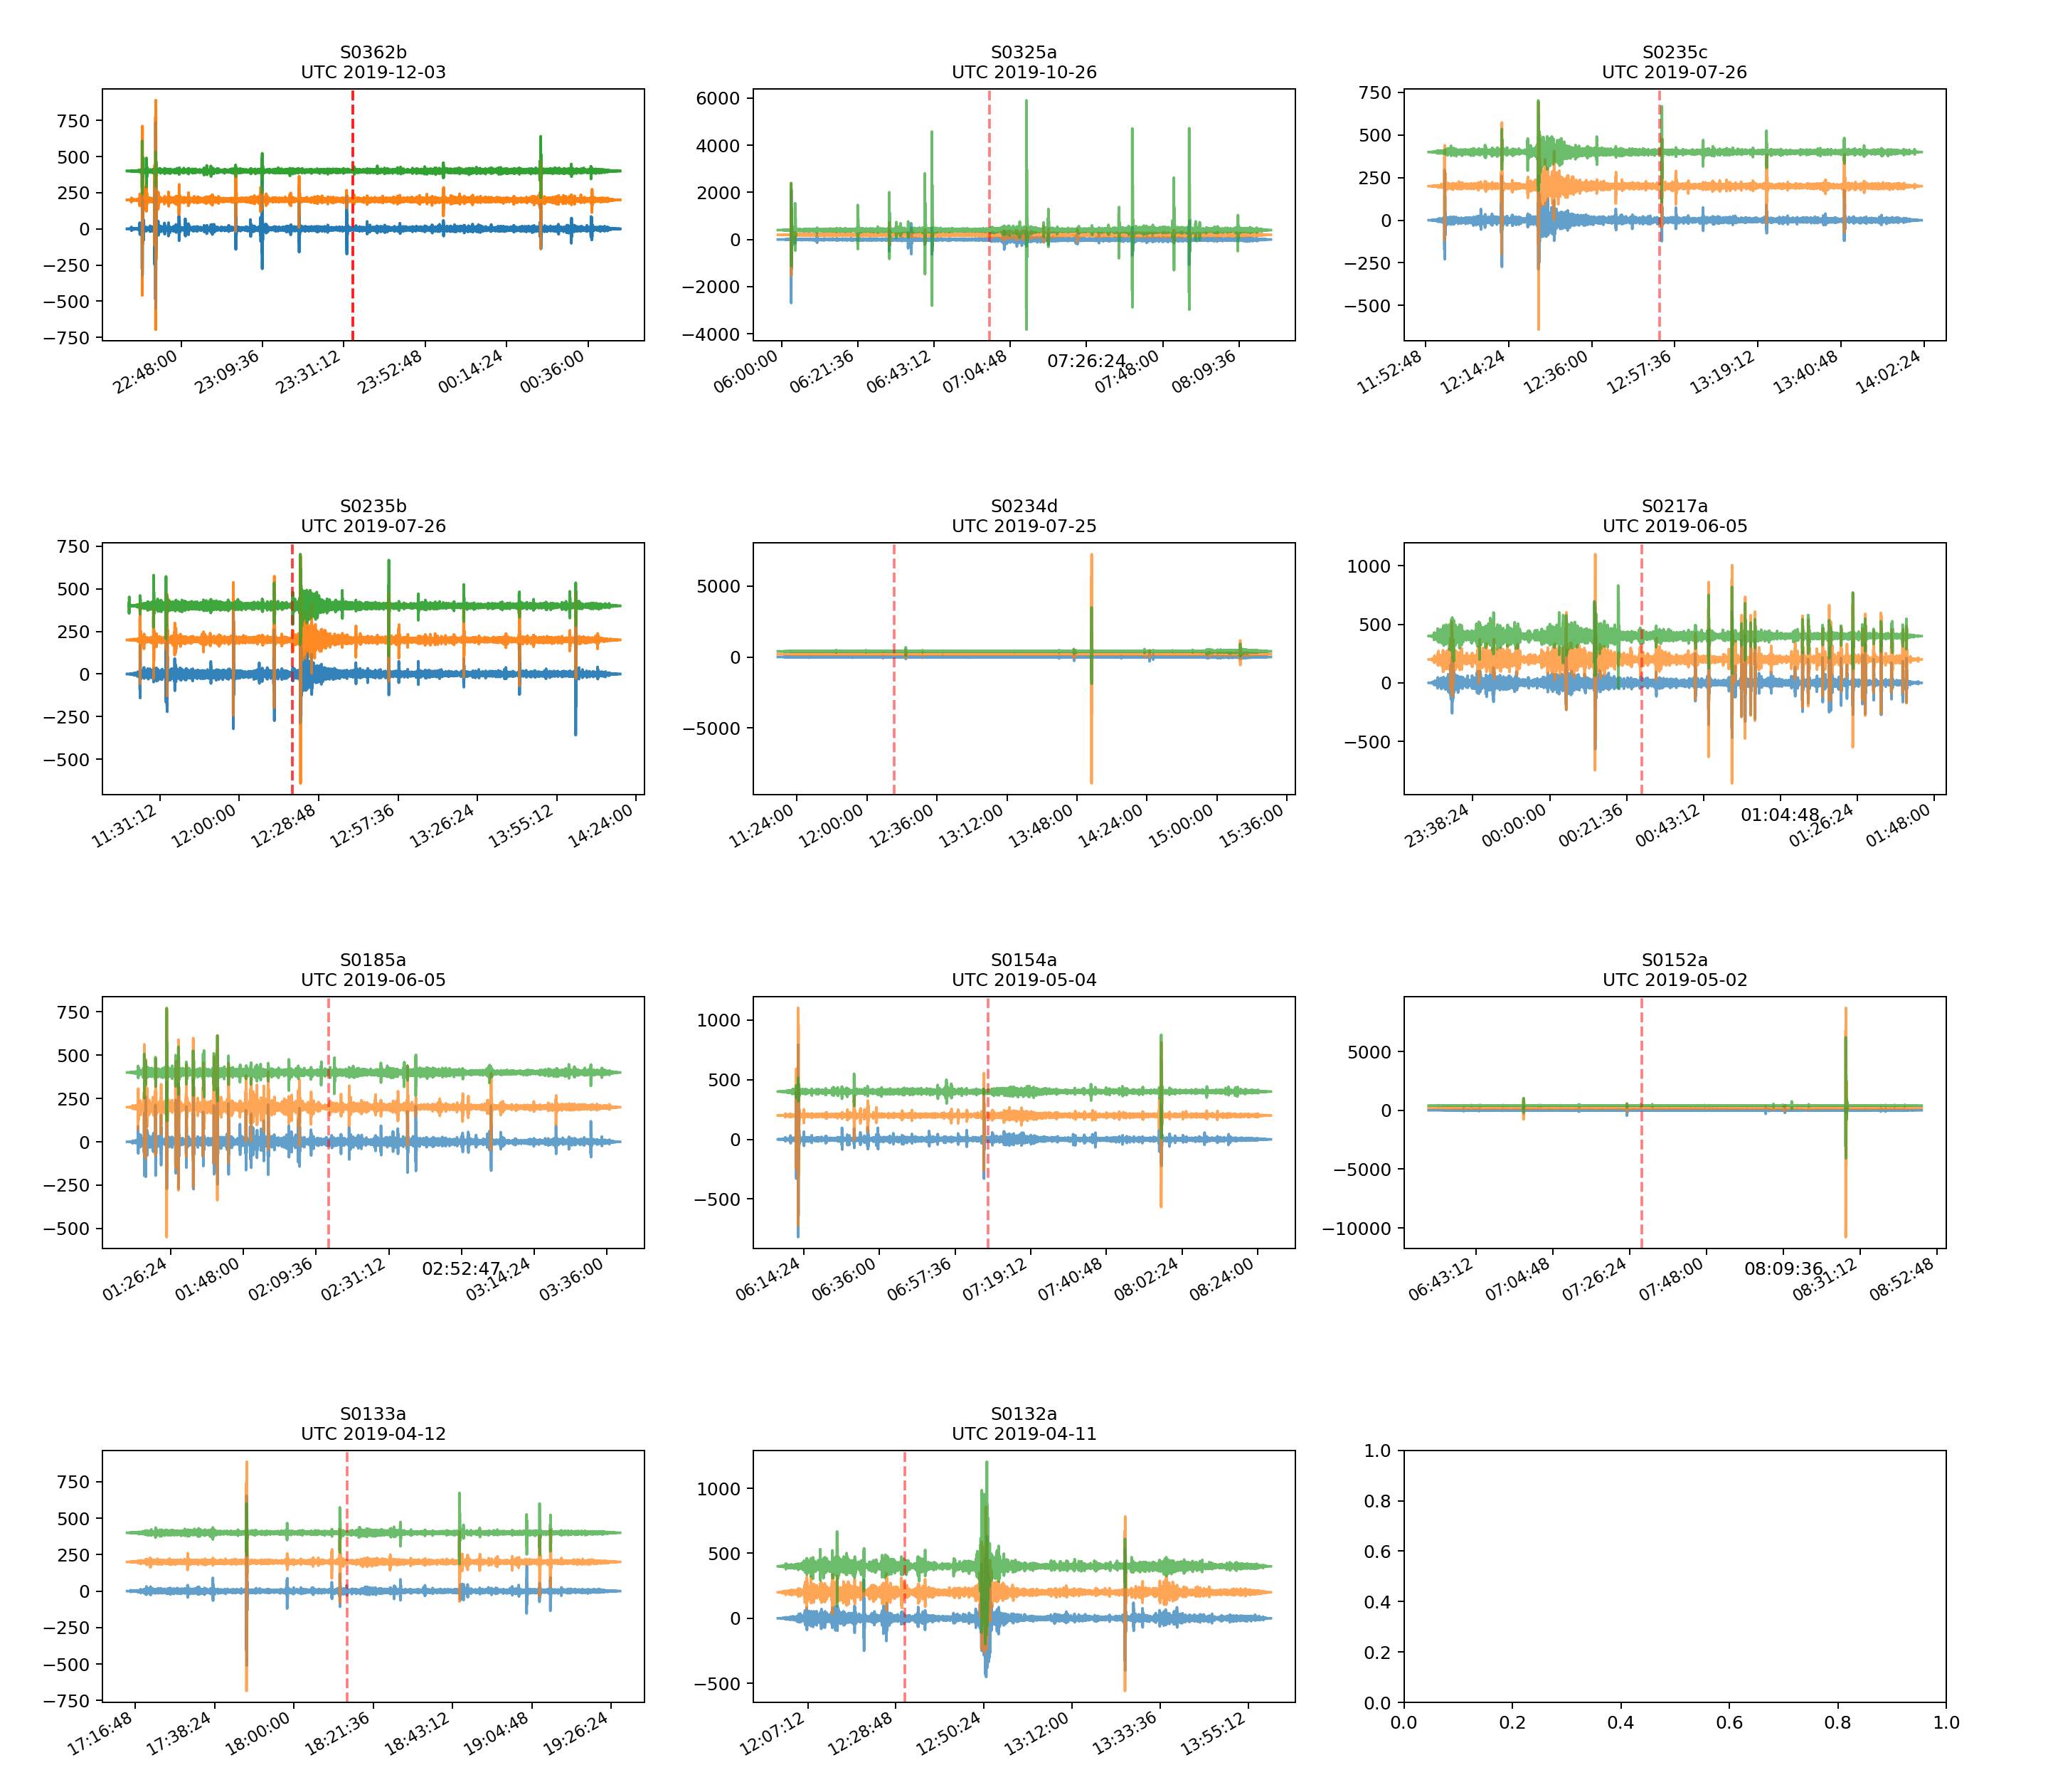

<IPython.core.display.Javascript object>


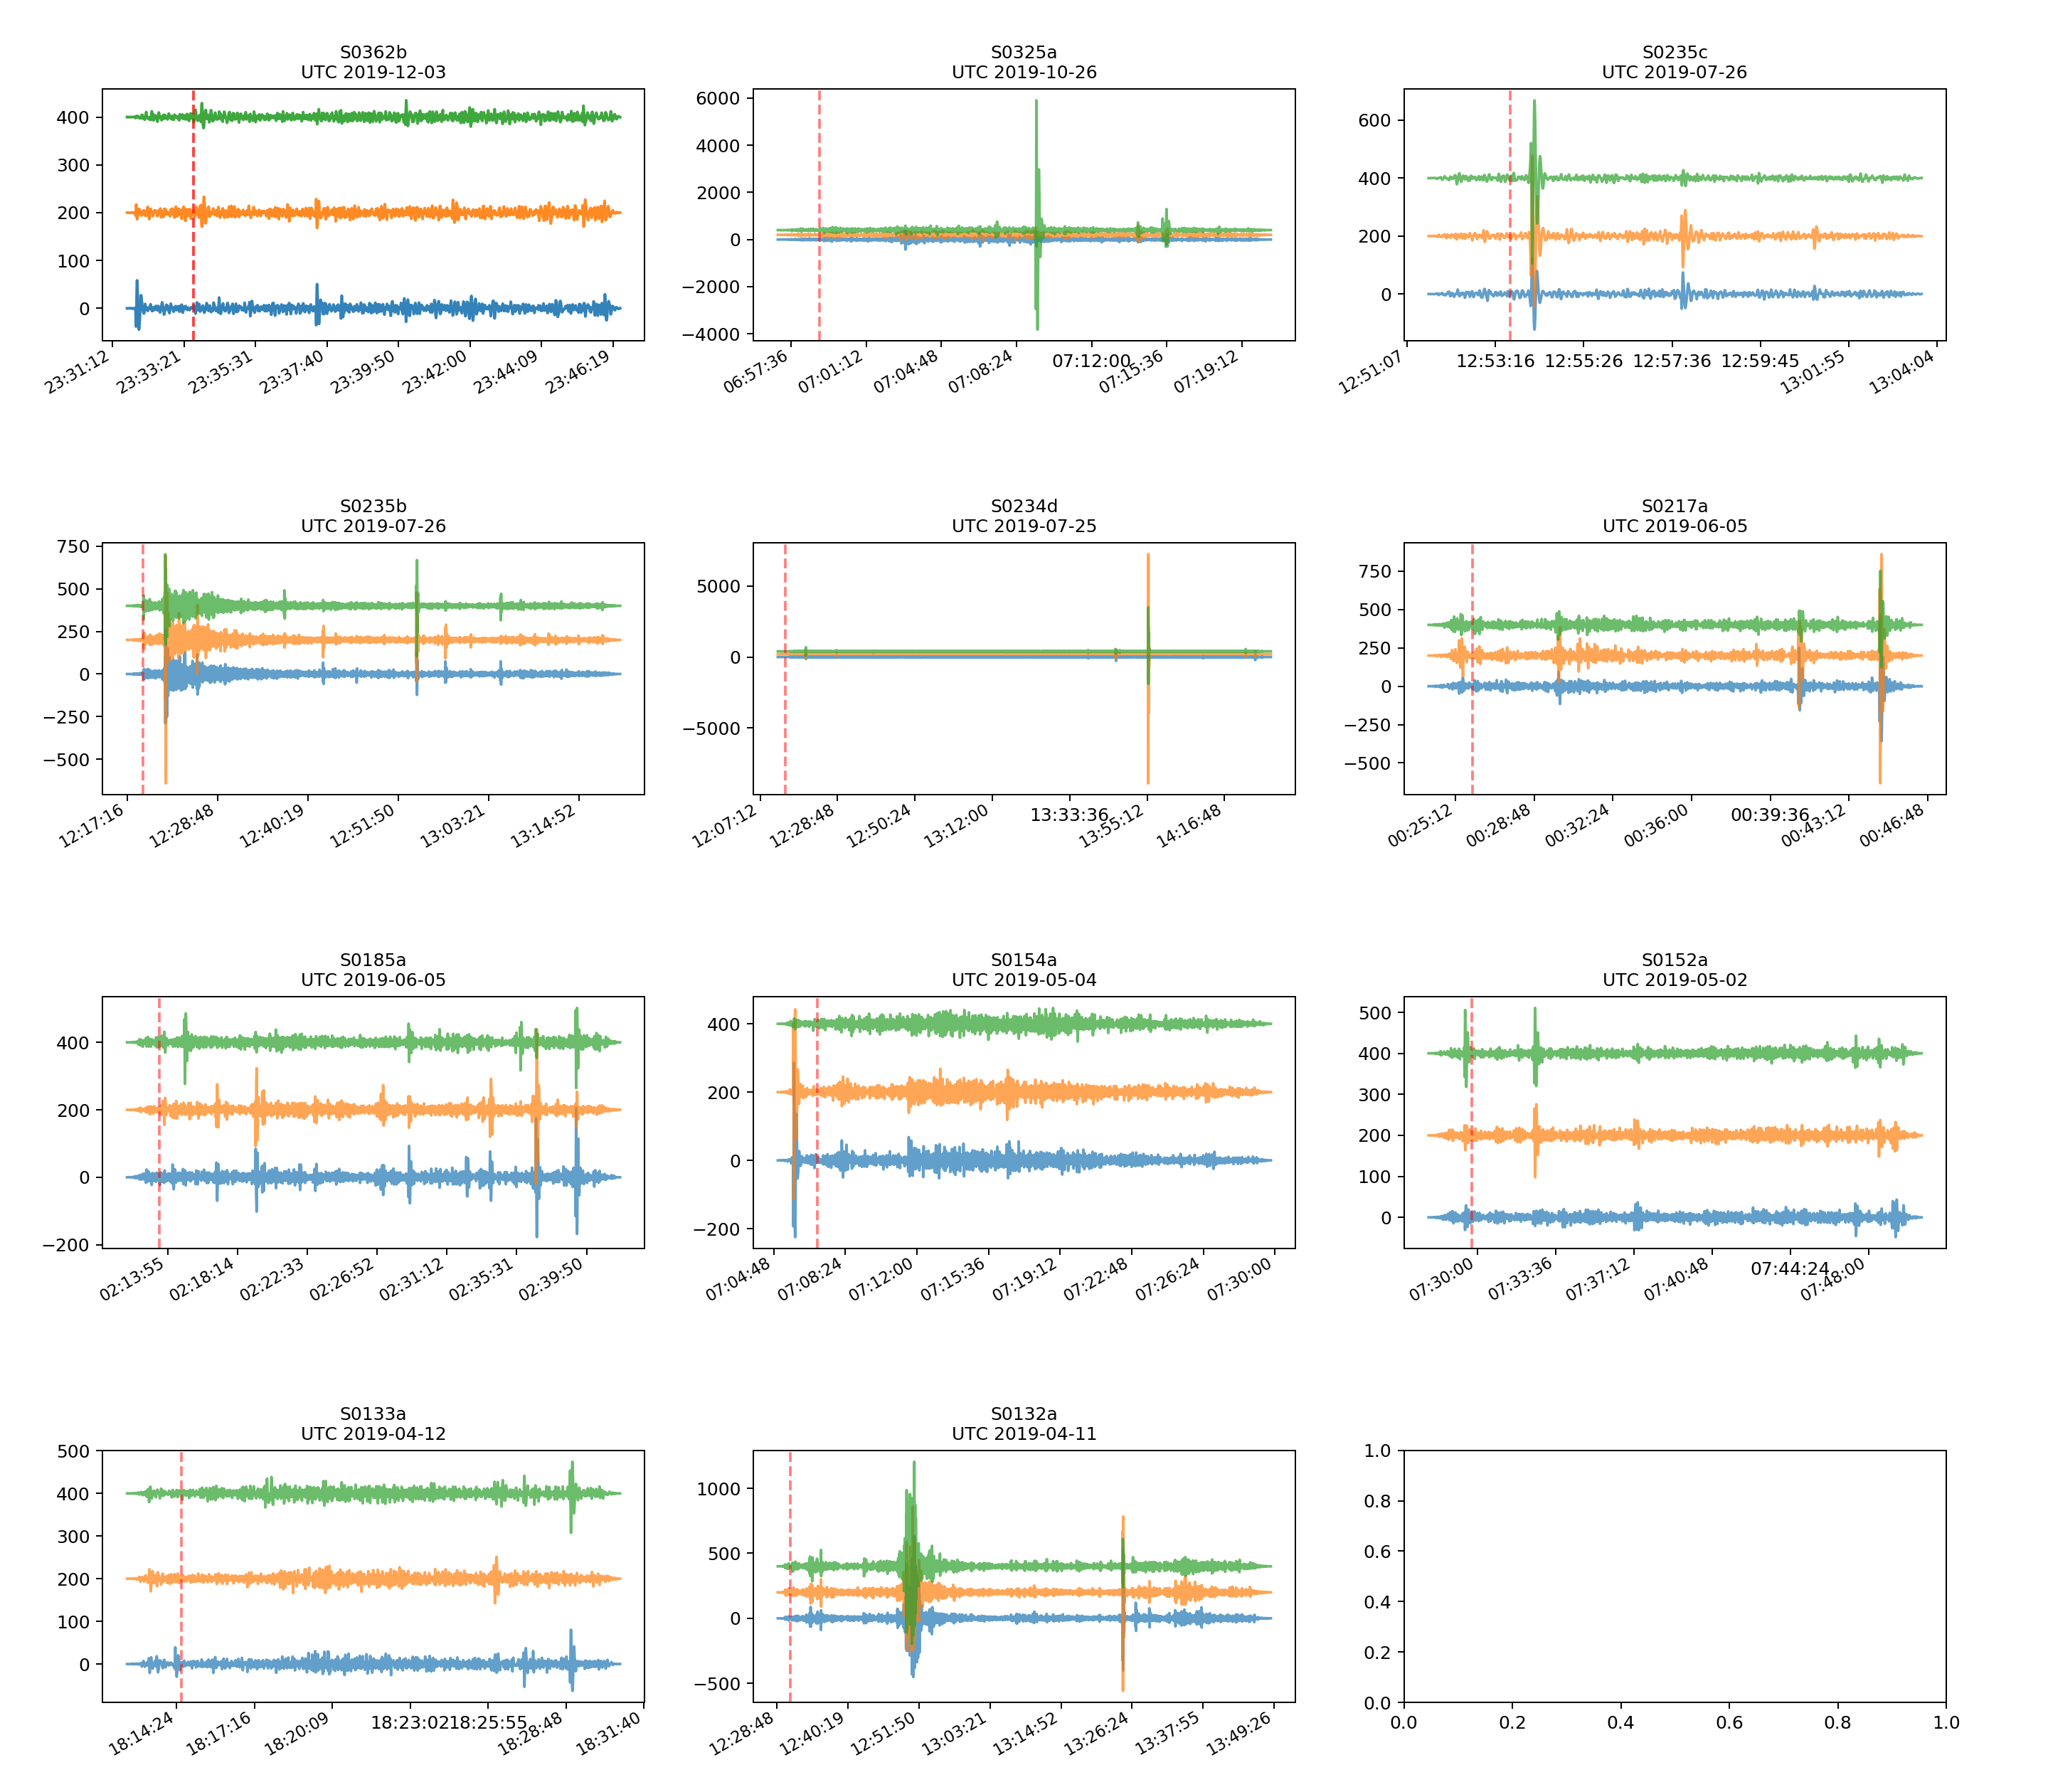

<IPython.core.display.Javascript object>


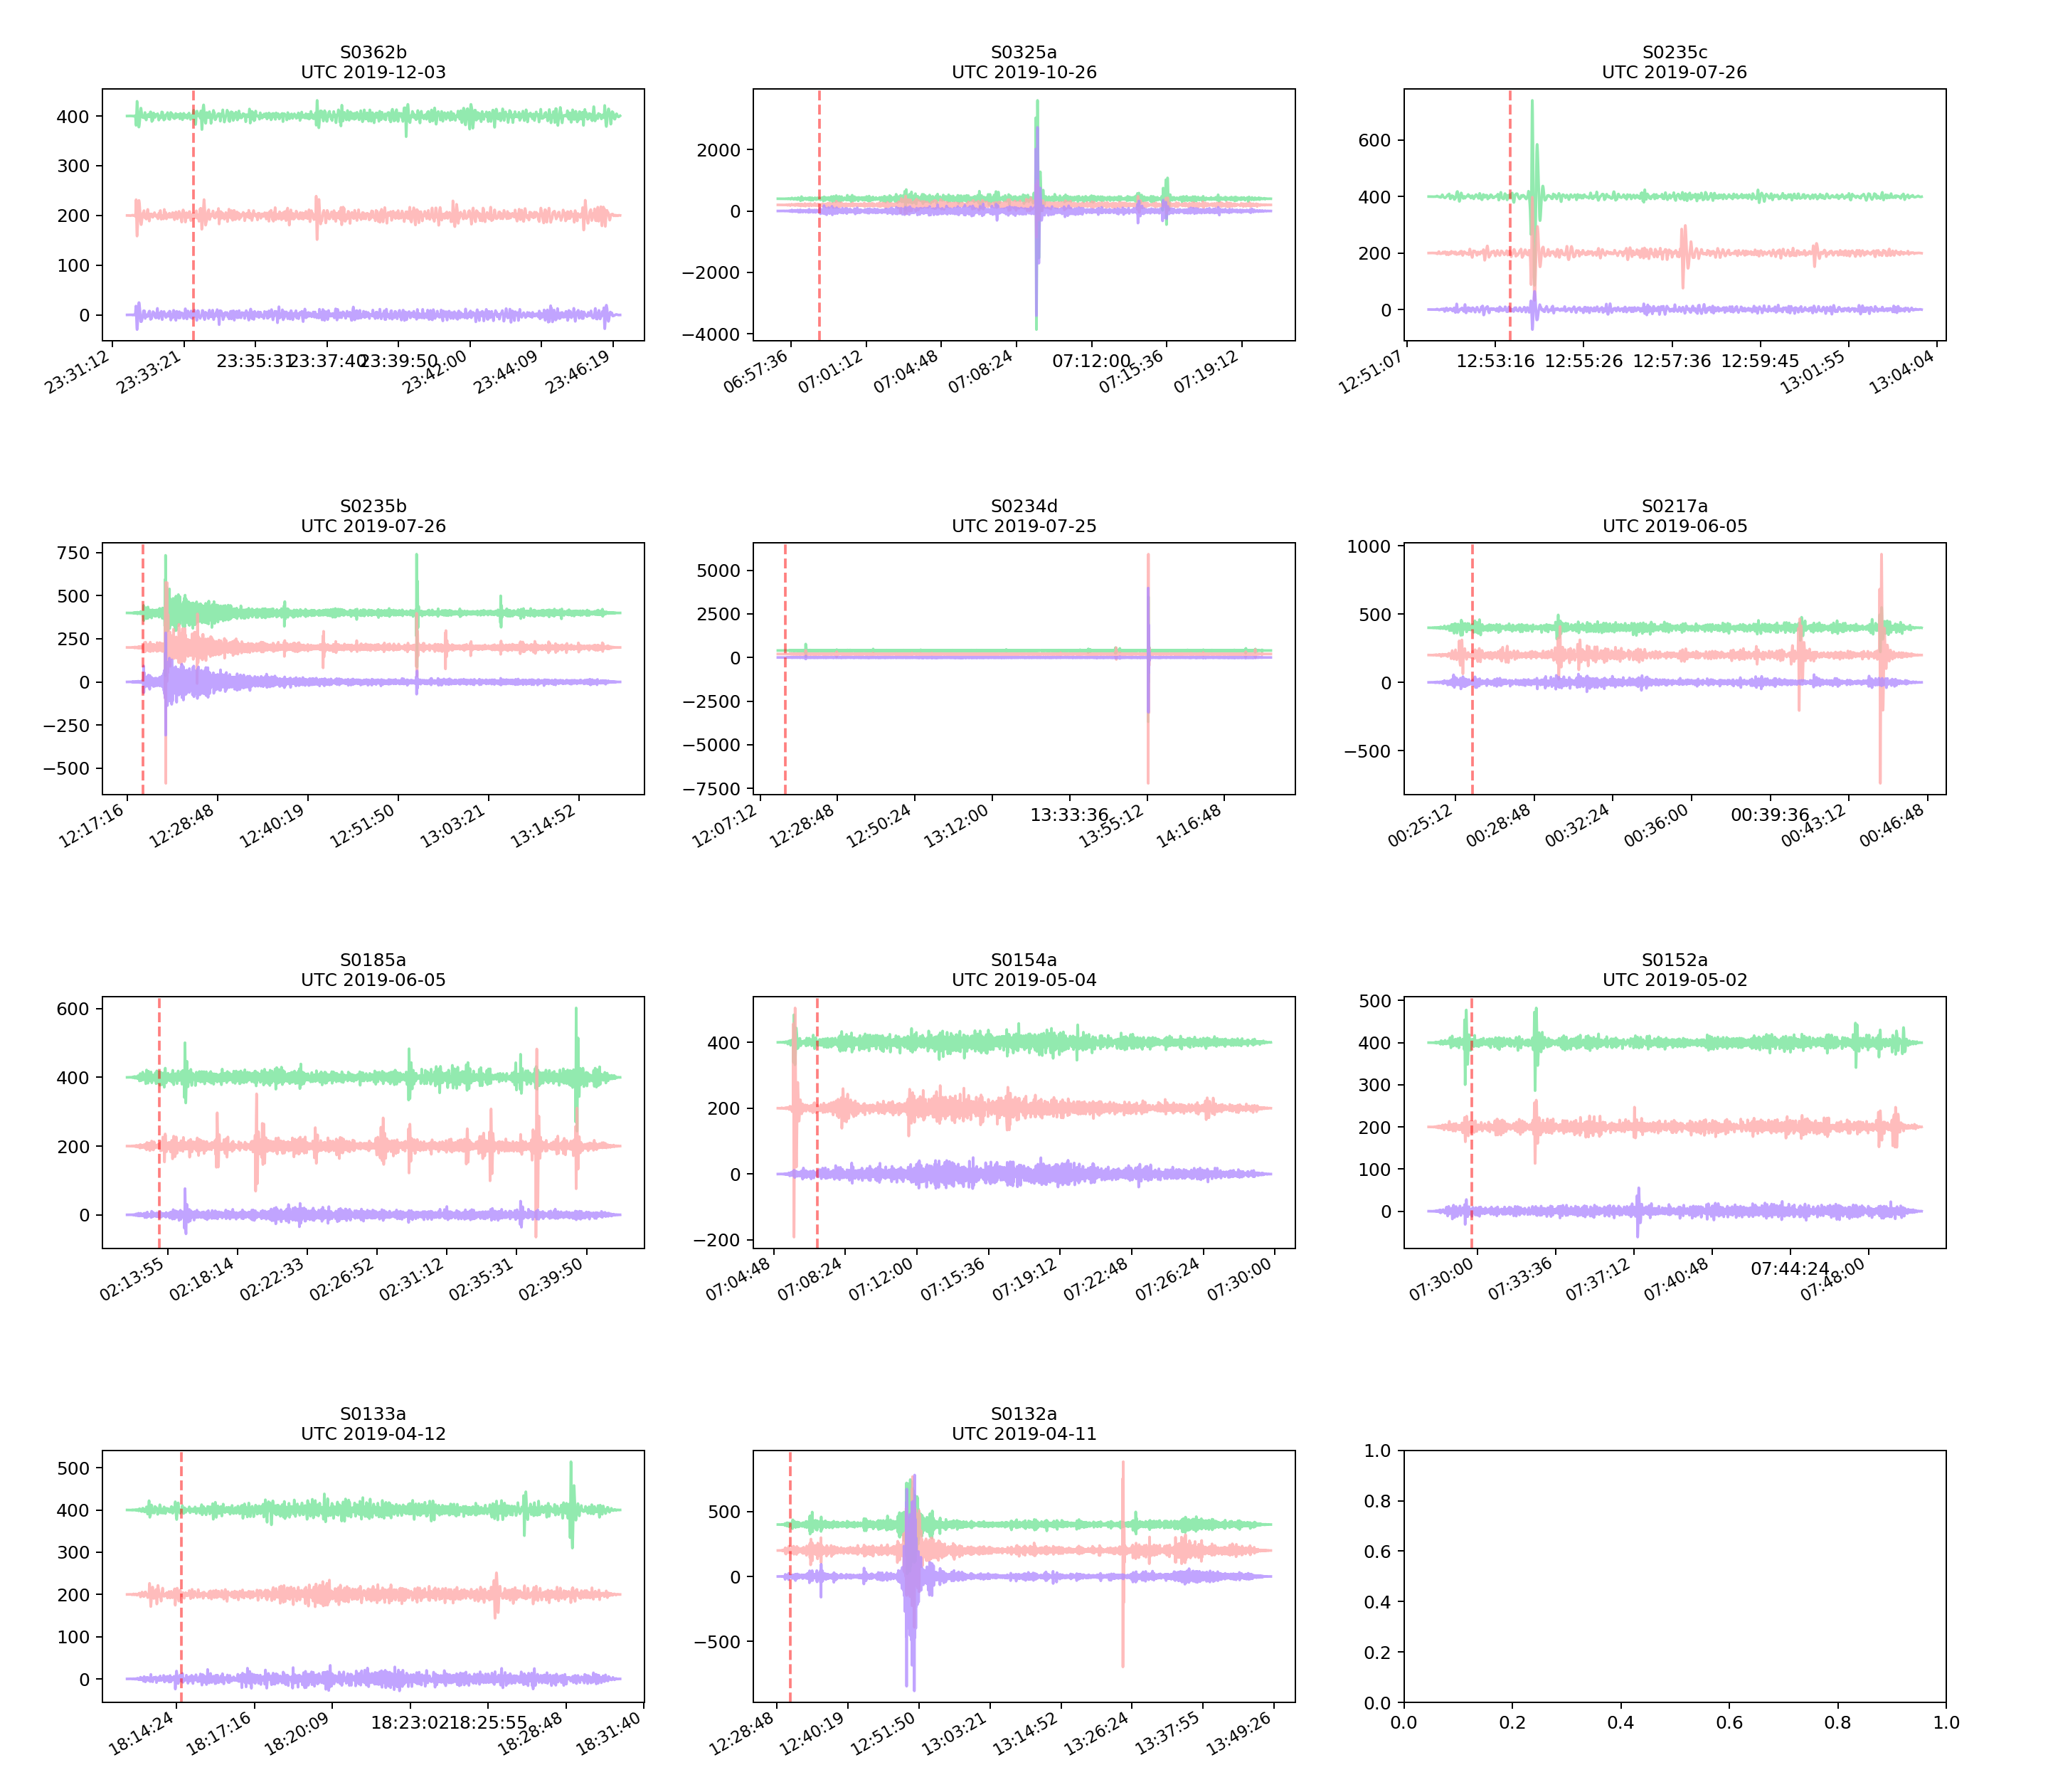

In [4]:
#creating subplot with 12 possible positions (11 events and 1 legend plot)
#ax[row][column]

#2hr window + filtered
fig1,ax = plt.subplots(4,3, figsize=(16,14))
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, hspace=0.8)

#2hr window + unfiltered
fig2,ax1 = plt.subplots(4,3, figsize=(16,14))
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, hspace=0.8)

#20min window + filtered
fig3,ax2 = plt.subplots(4,3, figsize=(16,14))
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, hspace=0.8)

#Z12 20min window + filtered
fig4,ax3 = plt.subplots(4,3, figsize=(16,14))
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, hspace=0.8)

In [5]:
e = 'S0362b'
### 2019-12-03T23:30:53
start362b = '2019-12-03T23:33:38'
end362b = '2019-12-03T23:44:32'

In [8]:
st362b = waveforms(start362b, end362b, 3600)
waveform_plotter(start362b, st362b, e, ax[0][0])

f362b = waveform_filter(st362b, 'bb')
waveform_plotter(start362b, f362b, e, ax1[0][0])

short362b = waveforms(start362b, end362b, 120)
sf362b = waveform_filter(short362b, 'bb')
waveform_plotter(start362b, sf362b, e, ax2[0][0])

xyz_plotter(start362b, sf362b, e, ax3[0][0])

In [9]:
e = 'S0325a'
### 2019-10-26T06:30:10
start325a = '2019-10-26T06:58:58' 
end325a = '2019-10-26T07:18:35'

P325a = '2019-10-26T06:58:58'

S325a = '2019-10-26T07:02:56'

In [10]:
st325a = waveforms(start325a, end325a, 3600)
waveform_plotter(start325a, st325a, e, ax[0][1])

f325a = waveform_filter(st325a, 'bb')
waveform_plotter(start325a, f325a, e, ax1[0][1])

short325a = waveforms(start325a, end325a, 120)
sf325a = waveform_filter(short325a, 'bb')
waveform_plotter(start325a, sf325a, e, ax2[0][1])

xyz_plotter(start325a, sf325a, e, ax3[0][1])

In [11]:
e = 'S0235c'
### 2019-07-26T12:52:10
start235c = '2019-07-26T12:53:39'
end235c = '2019-07-26T13:01:42'

P235c = '2019-07-26T12:53:44'

S235c = '2019-07-26T12:56:41'

In [12]:
st235c = waveforms(start235c, end235c, 3600)
waveform_plotter(start235c, st235c, e, ax[0][2])

f235c = waveform_filter(st235c, 'bb')
waveform_plotter(start235c, f235c, e, ax1[0][2])

short235c = waveforms(start235c, end235c, 120)
sf235c = waveform_filter(short235c, 'bb')
waveform_plotter(start235c, sf235c, e, ax2[0][2])

xyz_plotter(start235c, sf235c, e, ax3[0][2])

In [13]:
e = 'S0235b'
### 2019-07-26T12:16:15
start235b = '2019-07-26T12:19:16'
end235b = '2019-07-26T13:18:08'

P235b = '2019-07-26T12:19:19'

S235b = '2019-07-26T12:22:05'

In [15]:
st235b = waveforms(start235b, end235b, 3600)
waveform_plotter(start235b, st235b, e, ax[1][0])

f235b = waveform_filter(st235b, 'bb')
waveform_plotter(start235b, f235b, e, ax1[1][0])

short235b = waveforms(start235b, end235b, 120)
sf235b = waveform_filter(short235b, 'bb')
waveform_plotter(start235b, sf235b, e, ax2[1][0])

xyz_plotter(start235b, sf235b, e, ax3[1][0])

In [17]:
e = 'S0234d'
### 2019-07-25T14:09:59
start234d = '2019-07-25T12:14:09'
end234d = '2019-07-25T14:27:45'

In [20]:
st234d = waveforms(start234d, end234d, 3600)
waveform_plotter(start234d, st234d, e, ax[1][1])

f234d = waveform_filter(st234d, 'bb')
waveform_plotter(start234d, f234d, e, ax1[1][1])

short234d = waveforms(start234d, end234d, 120)
sf234d = waveform_filter(short234d, 'bb')
waveform_plotter(start234d, sf234d, e, ax2[1][1])

xyz_plotter(start234d, sf234d, e, ax3[1][1])

In [21]:
e = 'S0217a'
### 2019-06-05T02:06:23
start217a = '2019-06-05T00:25:58'
end217a = '2019-06-05T00:44:31'

In [22]:
st217a = waveforms(start217a, end217a, 3600)
waveform_plotter(start217a, st217a, e, ax[1][2])

f217a = waveform_filter(st217a, 'bb')
waveform_plotter(start217a, f217a, e, ax1[1][2])

short217a = waveforms(start217a, end217a, 120)
sf217a = waveform_filter(short217a, 'bb')
waveform_plotter(start217a, sf217a, e, ax2[1][2])

xyz_plotter(start217a, sf217a, e, ax3[1][2])

In [23]:
e = 'S0185a'
### 2019-06-05T02:06:23
start185a = '2019-06-05T02:13:25'
end185a = '2019-06-05T02:39:55'

P185a = '2019-06-05T02:13:50'

S185a = '2019-06-05T02:19:34'

In [25]:
st185a = waveforms(start185a, end185a, 3600)
waveform_plotter(start185a, st185a, e, ax[2][0])

f185a = waveform_filter(st185a, 'bb')
waveform_plotter(start185a, f185a, e, ax1[2][0])

short185a = waveforms(start185a, end185a, 120)
sf185a = waveform_filter(short185a, 'bb')
waveform_plotter(start185a, sf185a, e, ax2[2][0])

xyz_plotter(start185a, sf185a, e, ax3[2][0])

In [26]:
e = 'S0154a'
### 2019-05-04T07:01:03
start154a = '2019-05-04T07:07:00' 
end154a = '2019-05-04T07:27:48'

In [27]:
st154a = waveforms(start154a, end154a, 3600)
waveform_plotter(start154a , st154a, e, ax[2][1])

f154a = waveform_filter(st154a, 'bb')
waveform_plotter(start154a, f154a, e, ax1[2][1])

short154a = waveforms(start154a, end154a, 120)
sf154a = waveform_filter(short154a, 'bb')
waveform_plotter(start154a, sf154a, e, ax2[2][1])

xyz_plotter(start154a, sf154a, e, ax3[2][1])

In [28]:
e = 'S0152a'
### 2019-05-02T07:19:49 
start152a = '2019-05-02T07:29:46' 
end152a = '2019-05-02T07:48:26'

In [30]:
st152a = waveforms(start152a, end152a, 3600)
waveform_plotter(start152a, st152a, e, ax[2][2])

f152a = waveform_filter(st152a, 'bb')
waveform_plotter(start152a, f152a, e, ax1[2][2])

short152a = waveforms(start152a, end152a, 120)
sf152a = waveform_filter(short152a, 'bb')
waveform_plotter(start152a, sf152a, e, ax2[2][2])

xyz_plotter(start152a, sf152a, e, ax3[2][2])

In [31]:
e = 'S0133a'
### 2019-04-12T18:12:51
start133a = '2019-04-12T18:14:34' 
end133a = '2019-04-12T18:28:48'

P133a = '2019-04-12T18:14:35'

S133a = '2019-04-12T18:17:55'

In [32]:
st133a = waveforms(start133a, end133a, 3600)
waveform_plotter(start133a, st133a, e, ax[3][0])

f133a = waveform_filter(st133a, 'bb')
waveform_plotter(start133a, f133a, e, ax1[3][0])

short133a = waveforms(start133a, end133a, 120)
sf133a = waveform_filter(short133a, 'bb')
waveform_plotter(start133a, sf133a, e, ax2[3][0])

xyz_plotter(start133a, sf133a, e, ax3[3][0])

In [33]:
e = 'S0132a'
### 2019-04-11T12:27:22
start132a = '2019-04-11T12:30:57' 
end132a = '2019-04-11T13:46:55'

In [34]:
st132a = waveforms(start132a, end132a, 3600)
waveform_plotter(start132a, st132a, e, ax[3][1])

f132a = waveform_filter(st132a, 'bb')
waveform_plotter(start132a, f132a, e, ax1[3][1])

short132a = waveforms(start132a, end132a, 120)
sf132a = waveform_filter(short132a, 'bb')
waveform_plotter(start132a, sf132a, e, ax2[3][1])

xyz_plotter(start132a, sf132a, e, ax3[3][1])

In [ ]:
#fig1.savefig('bb_UVW_2hr_filtered.png')
#fig2.savefig('bb_UVW_2hr_unfiltered.png')
#fig3.savefig('bb_UVW_zoomed.png')
#fig4.savefig('bb_Z12_zoomed.png')